# Machine Learning Models

## Setup

In [85]:
# Necessary imports and more
# ==========================

import sys
sys.path.append('..')

import src
from pathlib import Path

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Data load

In [5]:
# Data load
# =========

data_file = '../data/processed/processed_data.csv'
data = pd.read_csv(data_file, index_col = [0])

In [7]:
# Split into X and y
# ==================

y = data.BaseSpType
X = data.drop(columns = ['BaseSpType']).copy()

In [63]:
# Split into train and test sets
# ==============================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
#scaler = preprocessing.RobustScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

## k-Nearest Neighbors

([<matplotlib.axis.XTick at 0x1f7bf406a90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

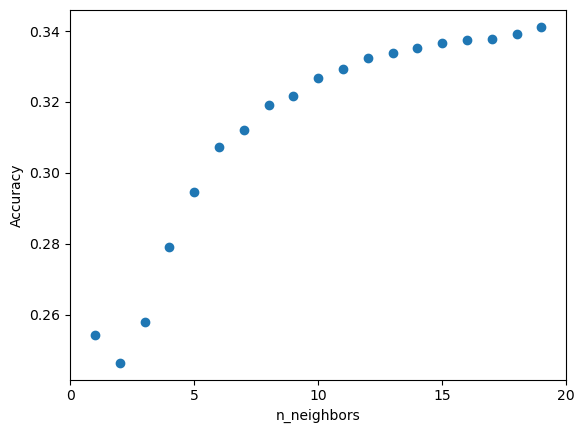

In [64]:
# Initial n_neighbors search
# ==========================

n_range = range(1, 20)
scores = []
for n in n_range:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.scatter(n_range, scores)
plt.xticks([0, 5, 10, 15, 20])

In [65]:
# Set n_neighbors constant based on initial search
# ================================================

N_NEIGHBORS = 11 # Odd values are preferred to avoid ties in voting

In [66]:
knn = KNeighborsClassifier(n_neighbors = N_NEIGHBORS)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('k-NN classifier accuracy on training set: {:.2f}%'.format(train_accuracy * 100))
print('k-NN classifier accuracy on testing set: {:.2f}%'.format(test_accuracy * 100))

k-NN classifier accuracy on training set: 44.11%
k-NN classifier accuracy on testing set: 32.93%


In [67]:
# Confusion matrix and classification report
# ==========================================

print('Confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
print('Classification report: \n', classification_report(y_test, y_test_pred))

Confusion matrix: 
 [[   9   98    1 ...    0    0    0]
 [  18 1296   37 ...    0    0    0]
 [   3  194   19 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
Classification report: 
               precision    recall  f1-score   support

           A       0.09      0.03      0.05       269
          A0       0.35      0.64      0.45      2037
          A1       0.13      0.05      0.08       347
          A2       0.22      0.24      0.23      1102
          A3       0.14      0.11      0.12       601
          A4       0.04      0.01      0.01       119
          A5       0.13      0.07      0.09       493
          A6       0.00      0.00      0.00        86
          A7       0.08      0.02      0.03       172
          A8       0.11      0.02      0.03       104
          A9       0.08      0.02      0.04       202
           B       0.00      0.00      0.00        22
          B0       0.00 

## Naive Bayes

In [68]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Naive Bayes accuracy on training set: {:.2f}%'.format(train_accuracy * 100))
print('Naive Bayes accuracy on testing set: {:.2f}%'.format(test_accuracy * 100))

Naive Bayes accuracy on training set: 23.07%
Naive Bayes accuracy on testing set: 22.52%


In [69]:
# Confusion matrix and classification report
# ==========================================

print('Confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
print('Classification report: \n', classification_report(y_test, y_test_pred))

Confusion matrix: 
 [[   0   97    4 ...    0    0    0]
 [   0 1330   29 ...    0    0    1]
 [   0  160   37 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    0    1]]
Classification report: 
               precision    recall  f1-score   support

           A       0.00      0.00      0.00       269
          A0       0.35      0.65      0.46      2037
          A1       0.13      0.11      0.12       347
          A2       0.16      0.03      0.05      1102
          A3       0.14      0.16      0.15       601
          A4       0.02      0.02      0.02       119
          A5       0.07      0.01      0.01       493
          A6       0.00      0.00      0.00        86
          A7       0.00      0.00      0.00       172
          A8       0.00      0.00      0.00       104
          A9       0.08      0.01      0.02       202
           B       0.00      0.00      0.00        22
          B0       0.00 

## Decision Tree

In [79]:
# Train the Decision Tree using the Gini Index
# ============================================

dtc_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 7, max_depth = 5, min_samples_leaf = 5)
dtc_gini.fit(X_train, y_train)

y_train_pred_gini = dtc_gini.predict(X_train)
y_test_pred_gini = dtc_gini.predict(X_test)

# Train the Decision Tree using Entropy
# =====================================

dtc_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 7, max_depth = 5, min_samples_leaf = 5)
dtc_entropy.fit(X_train, y_train)

y_train_pred_entropy = dtc_entropy.predict(X_train)
y_test_pred_entropy = dtc_entropy.predict(X_test)

In [83]:
# Results overview with Gini Index
# ================================

print('Results with Gini Index:\n')
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_test_pred_gini) * 100))
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_pred_gini))
print('Classification report:\n', classification_report(y_test, y_test_pred_gini))

Results with Gini Index:

Accuracy: 37.23%
Confusion matrix:
 [[   0   99    0 ...    0    0    0]
 [   0 1574    0 ...    0    0    0]
 [   0  267    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
Classification report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00       269
          A0       0.36      0.77      0.49      2037
          A1       0.00      0.00      0.00       347
          A2       0.18      0.27      0.21      1102
          A3       0.00      0.00      0.00       601
          A4       0.00      0.00      0.00       119
          A5       0.00      0.00      0.00       493
          A6       0.00      0.00      0.00        86
          A7       0.00      0.00      0.00       172
          A8       0.00      0.00      0.00       104
          A9       0.00      0.00      0.00       202
           B       0.00      0.00    

In [84]:
# Results overview with Entropy
# =============================

print('Results with Entropy:\n')
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_test_pred_entropy) * 100))
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_pred_entropy))
print('Classification report:\n', classification_report(y_test, y_test_pred_entropy))

Results with Entropy:

Accuracy: 37.15%
Confusion matrix:
 [[   0   78    0 ...    0    0    0]
 [   0 1295    0 ...    0    0    0]
 [   0  241    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
Classification report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00       269
          A0       0.39      0.64      0.49      2037
          A1       0.00      0.00      0.00       347
          A2       0.22      0.48      0.30      1102
          A3       0.00      0.00      0.00       601
          A4       0.00      0.00      0.00       119
          A5       0.00      0.00      0.00       493
          A6       0.00      0.00      0.00        86
          A7       0.00      0.00      0.00       172
          A8       0.00      0.00      0.00       104
          A9       0.00      0.00      0.00       202
           B       0.00      0.00      0

## Ensemble Model: Random Forest

In [86]:
rfc = RandomForestClassifier(n_estimators = 11)
rfc.fit(X_train, y_train)

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Random Forest accuracy on training set: {:.2f}%'.format(train_accuracy * 100))
print('Random Forest accuracy on testing set: {:.2f}%'.format(test_accuracy * 100))

Random Forest accuracy on training set: 98.84%
Random Forest accuracy on testing set: 36.14%


In [87]:
# Confusion matrix and classification report
# ==========================================

print('Confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
print('Classification report: \n', classification_report(y_test, y_test_pred))

Confusion matrix: 
 [[  12   80    2 ...    0    0    0]
 [  26 1188   39 ...    0    0    0]
 [   4  180   19 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
Classification report: 
               precision    recall  f1-score   support

           A       0.07      0.04      0.05       269
          A0       0.37      0.58      0.45      2037
          A1       0.12      0.05      0.08       347
          A2       0.21      0.26      0.23      1102
          A3       0.15      0.12      0.14       601
          A4       0.03      0.01      0.01       119
          A5       0.12      0.10      0.11       493
          A6       0.00      0.00      0.00        86
          A7       0.06      0.02      0.03       172
          A8       0.05      0.02      0.03       104
          A9       0.07      0.04      0.05       202
           B       0.00      0.00      0.00        22
          B0       0.00 